In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Read Data

Function from Assignment 1

In [4]:
from __future__ import print_function

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [5]:
np.unique(train_labels, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([600, 600, 600, 600, 600, 600, 600, 600, 600, 600]))

## The Classifier

prints accuracies given train, test, C, kernel

In [61]:
def classify_svm(train_data, train_labels, test_data, test_labels, C=1.0, kernel='linear'):
    classifier = svm.SVC(C=C, kernel=kernel)
    
    pipeline = Pipeline([
        ('scaling', StandardScaler()),
        ('svm', classifier),
    ])

    pipeline.fit(train_data, train_labels)
    print("The classification accuracy for C = {0} is {1}".format(C, pipeline.score(test_data, test_labels)))
    
    return classifier


# Problem 1: How does the classification accuracy change with C?

In [121]:
for c in [1000, 10, 1, 0.5, 0.1]:
    classify_svm(projected_train, train_12l, projected_test, test_12l, C=c)
    
for c in [1000, 10, 1, 0.5, 0.1]:
    classify_svm(train_data, train_labels, test_data, test_labels, C=c)

The classification accuracy for C = 1000 is 0.935
The classification accuracy for C = 10 is 0.935
The classification accuracy for C = 1 is 0.935
The classification accuracy for C = 0.5 is 0.935
The classification accuracy for C = 0.1 is 0.92
The classification accuracy for C = 1000 is 0.897
The classification accuracy for C = 10 is 0.897
The classification accuracy for C = 1 is 0.897
The classification accuracy for C = 0.5 is 0.897
The classification accuracy for C = 0.1 is 0.903


# Problem 2: Plotting Decision Boundary

In [13]:
data_label1 = train_12[train_12l==1]
data_label2 = train_12[train_12l==2]

mask = np.logical_or(train_labels==1,train_labels==2)
train_12 = train_data[mask]
train_12l = train_labels[mask]

mask = np.logical_or(test_labels==1,test_labels==2)
test_12 = test_data[mask]
test_12l = test_labels[mask]

Text(0.5, 1.0, 'PCA to 2D and classes 1 and 2')

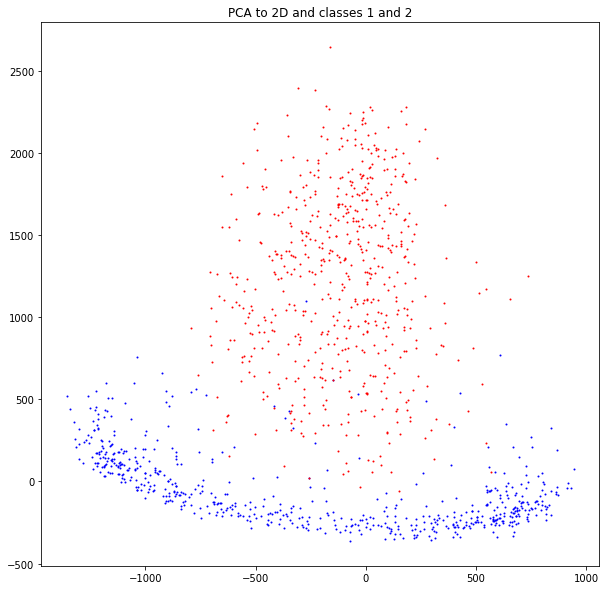

In [112]:
C = np.cov(train_12.transpose())    
eigvals, eigvecs = np.linalg.eigh(C)
eigvals = eigvals[::-1]
eigvecs = eigvecs.T[::-1]
pc2d = eigvecs[:2,:]

projected_train12 = np.dot(train_12, pc2d.T )
projected_test12 = np.dot(test_12, pc2d.T)

projected_data1 = np.dot(data_label1, pc2d.T ).real
projected_data2 = np.dot(data_label2, pc2d.T ).real
plt.scatter(projected_data1[:,1],projected_data1[:,0],c='b', s=1)
plt.scatter(projected_data2[:,1],projected_data2[:,0],c='r', s=1)
plt.title("PCA to 2D and classes 1 and 2")

In [98]:
classifier = classify_svm(projected_train, train_12l, projected_test, test_12l, C=0.1, kernel='linear')

The classification accuracy for C = 0.1 is 0.92


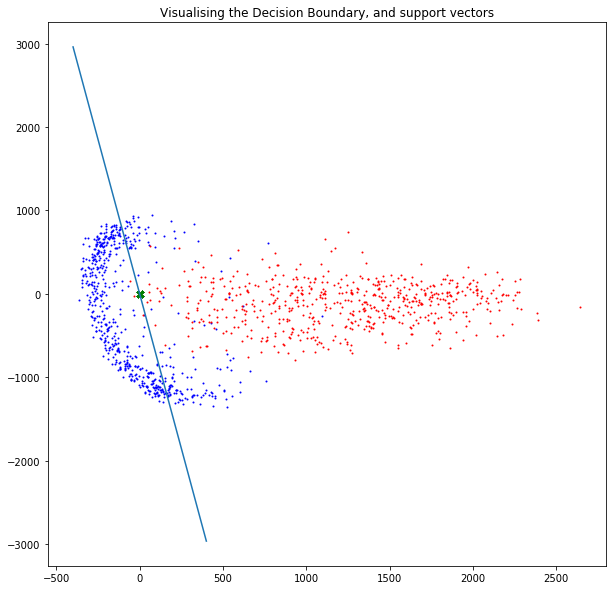

In [116]:
plt.rcParams['figure.figsize'] = [10,10]
w = classifier.coef_[0]
sl = -w[0]/w[1]

xrange = np.linspace(-400, 400)
yrange = sl * xrange - classifier.intercept_[0]/w[1]

plt.scatter(projected_data1[:,0],projected_data1[:,1], c='b', s=1)
plt.scatter(projected_data2[:,0],projected_data2[:,1], c='r', s=1)
plt.plot(xrange, yrange)

support_vecs = classifier.support_vectors_
plt.scatter(support_vecs[:, 0], support_vecs[:, 1], marker='x', c='g')

plt.title("Visualising the Decision Boundary, and support vectors")
plt.show()

# Problem 3: Plotting Support Vectors

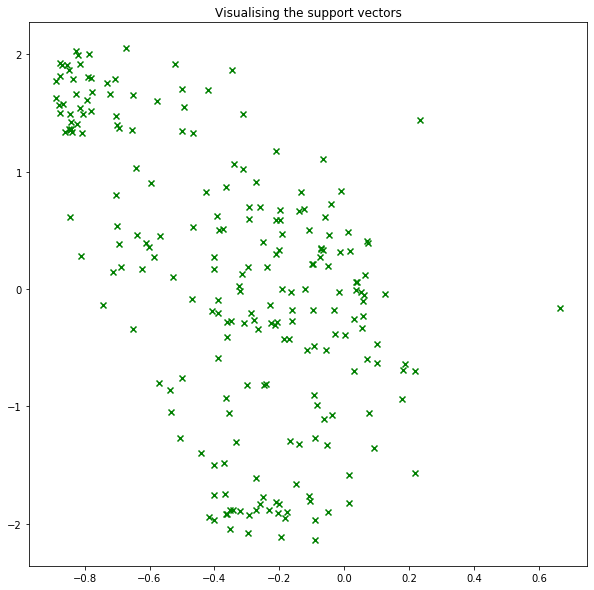

In [118]:
plt.scatter(support_vecs[:, 0], support_vecs[:, 1], marker='x', c='g')

plt.title("Visualising the support vectors")
plt.show()

In [ ]:

predicted = classifier.predict(test_data)
print("Classification report for classifier %s:n%sn" % (classifier, metrics.classification_report(test_labels, predicted)))
print("Confusion matrix:n%s" % metrics.confusion_matrix(test_labels, predicted))

In [76]:
pca = PCA(n_components=2)
p_train12 = pca.fit_transform(train_12)
p_test12 = pca.fit_transform(test_12)

p_data1 = np.dot(data_label1, pc2d.T ).real

In [77]:
train_12.shape

(1200, 784)

In [78]:
pca = PCA(n_components=2)
projected = pca.fit_transform(train_data)
projected

array([[ 138.76549804,  380.99058042],
       [1095.51056124,  253.45245635],
       [-120.73522714, -471.9250297 ],
       ...,
       [-504.38716941, -229.98760296],
       [ 203.98211145,  -52.57234313],
       [ 619.68844554,  511.97839118]])

In [79]:
projected_data1

array([[  146.9577383 , -1239.16831674],
       [  -12.88062967,   806.13450514],
       [ -187.11119157,   656.48563252],
       ...,
       [   -6.01079088,   802.74485294],
       [  547.70632832,  -907.93906756],
       [  -27.47344408,   544.35450747]])

In [80]:
pca.fit_transform(train_12)

array([[-442.28142847, 1056.50250975],
       [ 856.9283887 , -148.97738008],
       [-602.11980056, -988.80008955],
       ...,
       [ 757.5036248 , -170.20643309],
       [ 779.69656322, -356.32676327],
       [1465.41104231, -160.24082241]])